# Lectura de datos

In [2]:
# Cargar los datos
wine <- read.csv("wine.csv")

# Ver las primeras filas del dataframe para entender su estructura
head(wine)

,X,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,white
2,2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,white
3,3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white
4,4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white
5,5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white
6,6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white


# a. Describa las características de cada variante de vino.

A continuacion obenemos las estadisticas descriptiva de las variables para cada tipo de vino.

In [3]:
red <- subset(wine, type == "red")
white <- subset(wine, type == "white")

print("Resumen descriptivo para vino rojo")
summary(red)

print("Resumen descriptivo para vino blanco")
summary(white)



[1] "Resumen descriptivo para vino rojo"


       X        fixed.acidity   volatile.acidity  citric.acid   
 Min.   :4899   Min.   : 4.60   Min.   :0.1200   Min.   :0.000  
 1st Qu.:5298   1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090  
 Median :5698   Median : 7.90   Median :0.5200   Median :0.260  
 Mean   :5698   Mean   : 8.32   Mean   :0.5278   Mean   :0.271  
 3rd Qu.:6098   3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420  
 Max.   :6497   Max.   :15.90   Max.   :1.5800   Max.   :1.000  
 residual.sugar     chlorides       free.sulfur.dioxide total.sulfur.dioxide
 Min.   : 0.900   Min.   :0.01200   Min.   : 1.00       Min.   :  6.00      
 1st Qu.: 1.900   1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00      
 Median : 2.200   Median :0.07900   Median :14.00       Median : 38.00      
 Mean   : 2.539   Mean   :0.08747   Mean   :15.87       Mean   : 46.47      
 3rd Qu.: 2.600   3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00      
 Max.   :15.500   Max.   :0.61100   Max.   :72.00       Max.   :289.00      
    de

[1] "Resumen descriptivo para vino blanco"


       X        fixed.acidity    volatile.acidity  citric.acid    
 Min.   :   1   Min.   : 3.800   Min.   :0.0800   Min.   :0.0000  
 1st Qu.:1225   1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700  
 Median :2450   Median : 6.800   Median :0.2600   Median :0.3200  
 Mean   :2450   Mean   : 6.855   Mean   :0.2782   Mean   :0.3342  
 3rd Qu.:3674   3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900  
 Max.   :4898   Max.   :14.200   Max.   :1.1000   Max.   :1.6600  
 residual.sugar     chlorides       free.sulfur.dioxide total.sulfur.dioxide
 Min.   : 0.600   Min.   :0.00900   Min.   :  2.00      Min.   :  9.0       
 1st Qu.: 1.700   1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0       
 Median : 5.200   Median :0.04300   Median : 34.00      Median :134.0       
 Mean   : 6.391   Mean   :0.04577   Mean   : 35.31      Mean   :138.4       
 3rd Qu.: 9.900   3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0       
 Max.   :65.800   Max.   :0.34600   Max.   :289.00      Max.   :440.0

El grafico a continuacion nos muestra la distribucion de Alcohol por tipo de vino

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


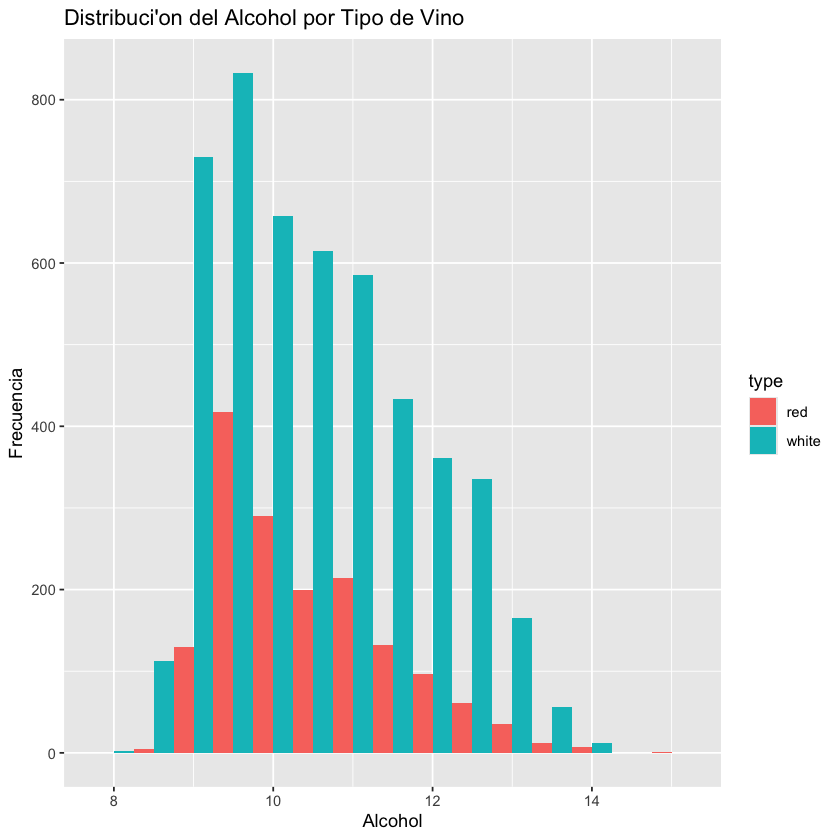

In [4]:
library(ggplot2)

ggplot(wine, aes(x = alcohol, fill = type)) +
  geom_histogram(position = "dodge", binwidth = 0.5) +
  labs(title = "Distribución del Alcohol por Tipo de Vino", x = "Alcohol", y = "Frecuencia")


# b. Determine las variables que influyen de manera significativa en el grado de alcohol del vino producido en las bodegas.

In [9]:
# Modelo de regresión lineal para predecir el grado de alcohol
model <- lm(alcohol ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + chlorides +
             free.sulfur.dioxide + total.sulfur.dioxide + density + pH + sulphates, data = wine)

summary(model)


Call:
lm(formula = alcohol ~ fixed.acidity + volatile.acidity + citric.acid + 
    residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    density + pH + sulphates, data = wine)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7178 -0.3318 -0.0277  0.2916 13.7643 

Coefficients:
                       Estimate Std. Error  t value Pr(>|t|)    
(Intercept)           6.009e+02  4.720e+00  127.316  < 2e-16 ***
fixed.acidity         5.697e-01  9.143e-03   62.305  < 2e-16 ***
volatile.acidity      1.411e+00  5.470e-02   25.797  < 2e-16 ***
citric.acid           4.398e-01  5.885e-02    7.473 8.85e-14 ***
residual.sugar        2.081e-01  2.823e-03   73.730  < 2e-16 ***
chlorides            -1.133e-01  2.469e-01   -0.459    0.646    
free.sulfur.dioxide   5.942e-04  5.575e-04    1.066    0.287    
total.sulfur.dioxide -4.538e-03  1.975e-04  -22.979  < 2e-16 ***
density              -6.093e+02  4.892e+00 -124.545  < 2e-16 ***
pH                    2.962e+00  5.610e

Podemos observar que las variables fixed.acidity, volatile.acidity, citric.acid, residual.sugar, total.sulfur.dioxide, density, pH y sulphates son significativas para el modelo de regresion.

# c. Un vino se considera exclusivo si su puntación de calidad es 9 o 10. ¿Cuáles de las características del vino producido en las bodegas aumentan la probabilidad de que sea considerado exclusivo?

In [12]:
# Definir exclusividad
wine$exclusive <- ifelse(wine$quality >= 9, 1, 0)

# Modelo de regresión logística para predecir la exclusividad
logistic_model <- glm(exclusive ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar +
                      free.sulfur.dioxide + total.sulfur.dioxide + density + pH + sulphates,
                      family = binomial, data = wine)

# Resumen del modelo
summary(logistic_model)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = exclusive ~ fixed.acidity + volatile.acidity + 
    citric.acid + residual.sugar + free.sulfur.dioxide + total.sulfur.dioxide + 
    density + pH + sulphates, family = binomial, data = wine)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1968  -0.0251  -0.0098  -0.0045   3.7910  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           1.095e+03  3.750e+02   2.919 0.003510 ** 
fixed.acidity         1.359e+00  3.605e-01   3.768 0.000164 ***
volatile.acidity     -6.845e-01  4.416e+00  -0.155 0.876801    
citric.acid           2.948e+00  2.562e+00   1.151 0.249919    
residual.sugar        4.735e-01  2.134e-01   2.218 0.026535 *  
free.sulfur.dioxide   2.973e-02  3.909e-02   0.761 0.446945    
total.sulfur.dioxide -1.329e-02  1.881e-02  -0.706 0.479939    
density              -1.159e+03  3.858e+02  -3.005 0.002660 ** 
pH                    1.175e+01  3.758e+00   3.126 0.001774 ** 
sulphates          

Las variables que aumentan la probabilidad de considerar el vino como exlusivo son fixed.acidity, residual.sugar, density y pH.